In [2]:
import numpy as np
import matplotlib.pyplot as plt

NOTA : 

ahora tenemos varios parametros (varias x para cada dato), para simplificar compararemos los resultados obtenidos por el modelo con el que deberia ser. 

Es decir: nos centraremos en analizar/reducir el error

-----------

Generación de los datos del problema:

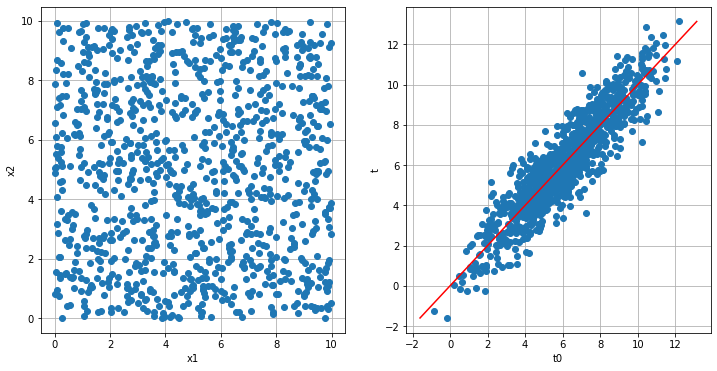

Error esperado = 1029.446953


In [3]:
# Parametros:
d = 5 # Dimension del problema
w = np.random.randn(1, d)
b = 1.0
xmin = 0.0
xmax = 10.0
noise = 1.0
n = 1000

# Datos del problema generados al azar:
x = xmin + np.random.rand(n, d)*(xmax - xmin)
t0 = np.dot(x, w.T) + b 
t = t0 + np.random.randn(n, 1)*noise
tmin = np.min(t)
tmax = np.max(t)

# Distribucion de las dos primeras variables:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.plot(x[:, 0], x[:, 1], 'o')
plt.grid(True)
plt.xlabel("x1")
plt.ylabel("x2")
plt.subplot(122)

# Grafica de t frente a t0:
plt.plot(t0, t, 'o')
plt.plot([tmin, tmax], [tmin, tmax], 'r-')
plt.grid(True)
plt.xlabel("t0")
plt.ylabel("t")
plt.show()

# Error esperado:
e = np.sum((t-t0)*(t-t0))
print("Error esperado = %f" % e)

-----

Modelo de regresión lineal con los parámetros inicializados al azar:

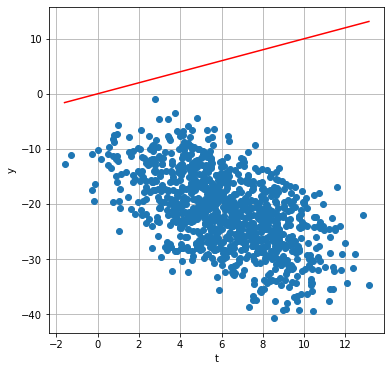

Error = 829405.067792


In [4]:
w = np.random.randn(1, d)
b = np.random.randn()

# Aplico el modelo a los datos y comparo la prediccion y con el objetivo t:
y = np.dot(x, w.T) + b

# Grafica de y frente a t:
plt.figure(figsize=(6, 6))
plt.plot(t, y, 'o')
plt.plot([tmin, tmax], [tmin, tmax], 'r-')
plt.grid(True)
plt.xlabel("t")
plt.ylabel("y")
plt.show()

# Error:
e = np.sum((y-t)*(y-t))  
print("Error = %f" % e)

Entrenamiento del modelo:

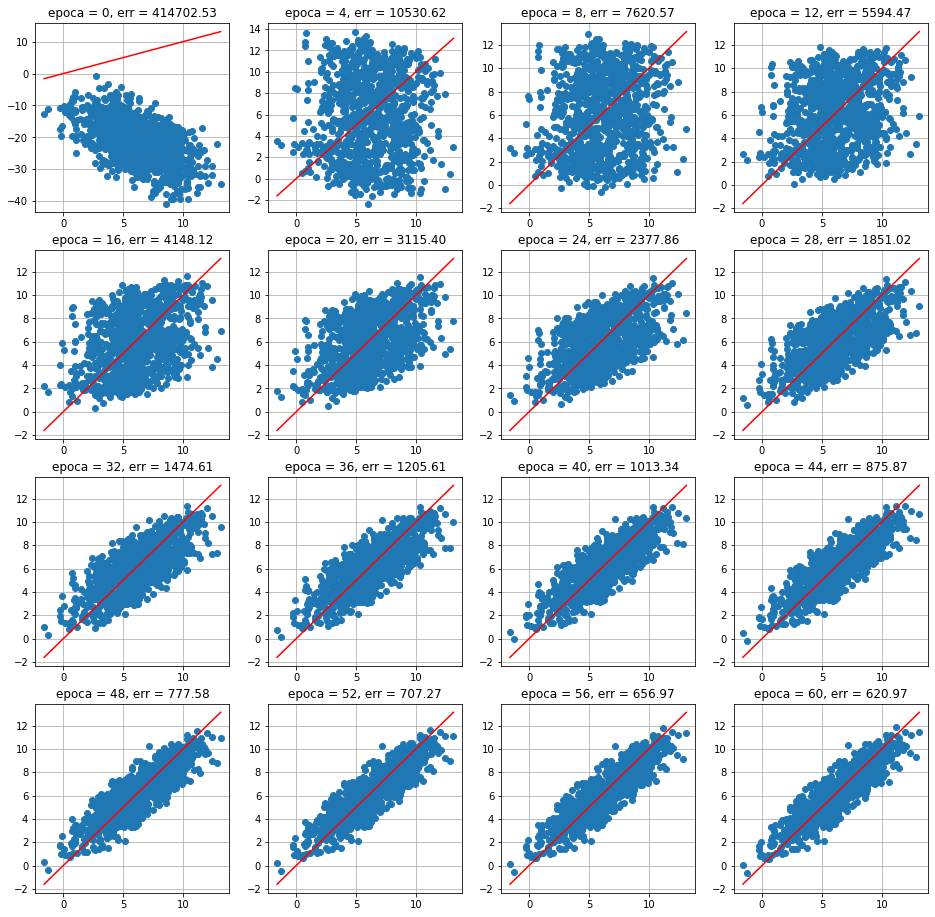

In [5]:
nepocas = 64
eta = 0.000005

plt.figure(figsize=(16,16))

k = 1
error = []
for epoch in range(nepocas):
    y = np.dot(x, w.T) + b
    
    #----------------------------------------------------------
    # TO-DO: Calcula el error:
    # x == (1000, 5)
    # w == (1, 5)
    # b == ()
    # t == (1000, 1)
    # y == (1000, 1)
    y_minus_t = y - t
    e = 0.5 * (y_minus_t**2).sum()
    error.append(e)

    #----------------------------------------------------------

    if epoch%4 == 0:
        plt.subplot(4, 4, k)
        plt.plot(t, y, 'o')
        plt.plot([tmin, tmax], [tmin, tmax], 'r-')
        plt.grid(True)
        plt.title("epoca = %d, err = %.2f" % (epoch, e))
        k += 1
        
    #----------------------------------------------------------
    # TO-DO: Calcula los gradientes y actualiza los parametros: 
    db = y_minus_t.sum()
    dw = y_minus_t.T @ x
    b -= eta * db
    w -= eta * dw

    #----------------------------------------------------------

plt.show()

Error frente a número de épocas:

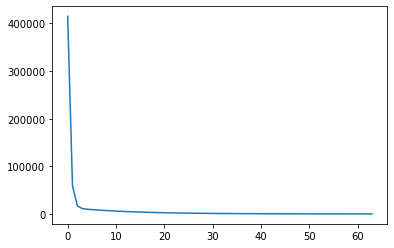

In [6]:
plt.plot(error)
plt.show()